In [619]:
import pandas as pd
import os

In [620]:
os.listdir()

['.DS_Store',
 'disease_cause.csv',
 'medicine_side_effects.csv',
 'medicine_uses.csv',
 'Untitled.ipynb',
 'disease_specialty.csv',
 'embeddigs_diseases.csv',
 'diseases_embedding-Copy1.ipynb',
 '.ipynb_checkpoints',
 'application.log',
 'diseases_embedding.ipynb',
 'disease_symptoms.csv']

In [621]:
final_df = pd.read_csv('embeddigs_diseases.csv')

In [625]:
import ampligraph
import numpy as np

In [626]:
from ampligraph.evaluation import train_test_split_no_unseen
from ampligraph.datasets import load_from_csv


In [627]:
X = load_from_csv('.','embeddigs_diseases.csv',sep=',')

In [628]:
X

array([['subject', 'predicate', 'object'],
       ['encephalitis', 'Cause', 'rabies'],
       ['bacterial vaginosis', 'Cause', 'Gardnerella vaginalis'],
       ...,
       ['acrodermatitis enteropathica', 'Symptom', 'alopecia'],
       ['Lassa fever', 'Symptom', 'alopecia'],
       ['mercury poisoning', 'Symptom', 'proteinuria']], dtype=object)

In [629]:
X = X[1:]

In [630]:
X.shape[0]

9552

In [631]:
print(X.shape)

(9552, 3)


In [632]:
from ampligraph.latent_features import ComplEx

model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                seed=0, 
                verbose=True)

In [633]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X)


Average Loss:   0.190152: 100%|██████████| 300/300 [06:11<00:00,  1.24s/epoch]


In [634]:
len(set(X[:,0]))

6150

In [635]:
diseases =np.array(list(set(X[:,0])))
disease_embeddings = dict(zip(diseases, model.get_embeddings(diseases)))
len(diseases)

6150

In [636]:
len(dict(zip(diseases,(model.get_embeddings(diseases)))))

6150

In [637]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in disease_embeddings.values()]))


In [753]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans,DBSCAN,OPTICS

clustering_algorithm = DBSCAN(eps=0.3,min_samples=4)
clusters = find_clusters(diseases, model, clustering_algorithm, mode='entity')

In [754]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [785]:
clusters = ['cluster19','cluster1','cluster14','cluster3','cluster23','cluster11','cluster4']
title =['Respiratory System Related','Infectious Disease Related','Diabetes Related','Cancer Related','Urology',
        'hematology','gastro related']
d = {}
for i,c in enumerate(clusters):
    d[c] = title[i]

In [750]:
plot_df = pd.DataFrame({"diseases": diseases, 
                        "embedding1": embeddings_2d[:, 0], 
                        "embedding2": embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [782]:
plot_df_display =plot_df[(plot_df['cluster']=='cluster19')|(plot_df['cluster']=='cluster1')|(plot_df['cluster']=='cluster14')
       |(plot_df['cluster']=='cluster3')|(plot_df['cluster']=='cluster23')|(plot_df['cluster']=='cluster11')
        |(plot_df['cluster']=='cluster4')]

In [783]:
def plot_clusters(hue):
    np.random.seed(0)
    plt.figure(figsize=(20, 15))
    plt.title("{} embeddings".format(hue).capitalize())
    
    
   
    ax = sns.scatterplot(data=plot_df_display, x="embedding1", y="embedding2", hue=hue)
    leg_handles = ax.get_legend_handles_labels()[0]
    ax.legend(leg_handles,d.values(), title='New legend')
    
    
    data=plot_df[plot_df.diseases!="unk"]
    texts = []
    
    

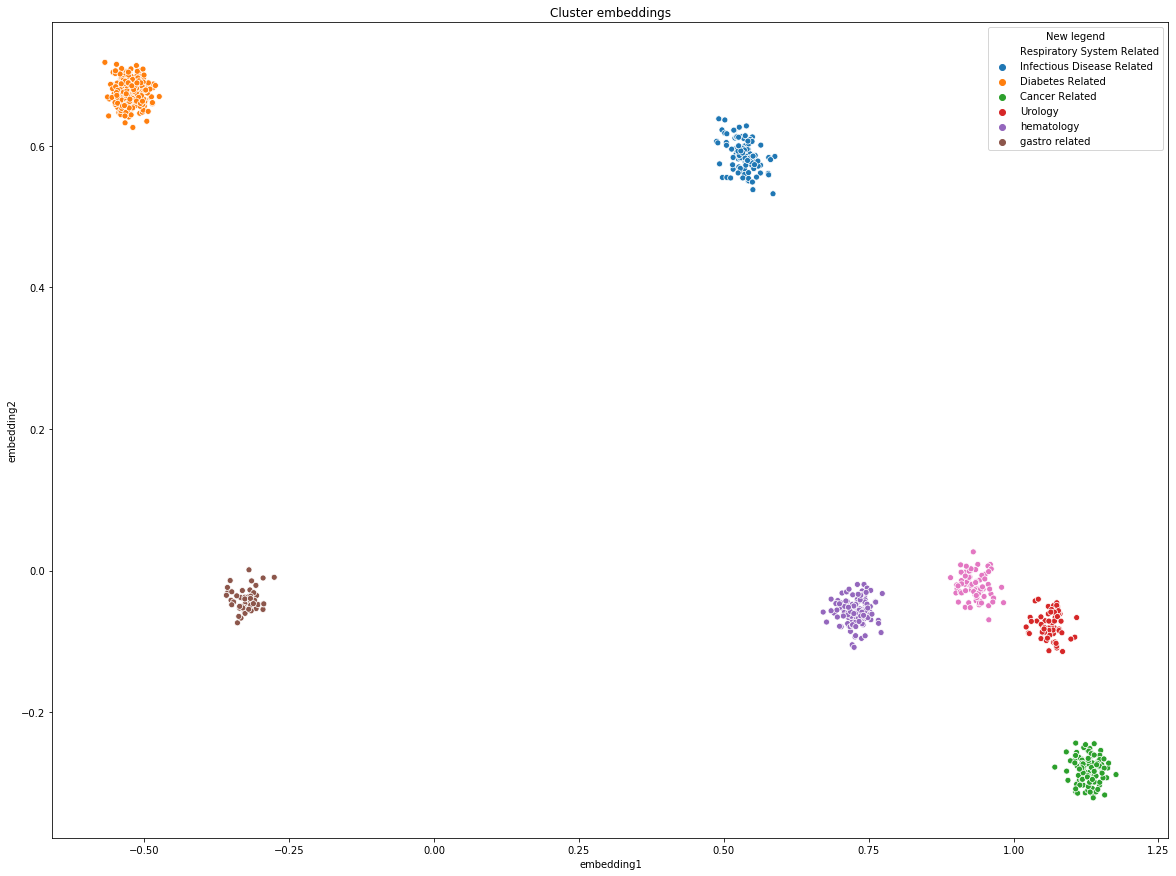

In [784]:
plot_clusters('cluster')

In [786]:
_ih[-5:]

["plot_df_display =plot_df[(plot_df['cluster']=='cluster19')|(plot_df['cluster']=='cluster1')|(plot_df['cluster']=='cluster14')\n       |(plot_df['cluster']=='cluster3')|(plot_df['cluster']=='cluster23')|(plot_df['cluster']=='cluster11')\n        |(plot_df['cluster']=='cluster4')]",
 'def plot_clusters(hue):\n    np.random.seed(0)\n    plt.figure(figsize=(20, 15))\n    plt.title("{} embeddings".format(hue).capitalize())\n    \n    \n   \n    ax = sns.scatterplot(data=plot_df_display, x="embedding1", y="embedding2", hue=hue)\n    leg_handles = ax.get_legend_handles_labels()[0]\n    ax.legend(leg_handles,d.values(), title=\'New legend\')\n    \n    \n    data=plot_df[plot_df.diseases!="unk"]\n    texts = []\n    \n    ',
 "plot_clusters('cluster')",
 "clusters = ['cluster19','cluster1','cluster14','cluster3','cluster23','cluster11','cluster4']\ntitle =['Respiratory System Related','Infectious Disease Related','Diabetes Related','Cancer Related','Urology',\n        'hematology','gastro re

In [812]:
df = pd.DataFrame(columns=d.values())

In [813]:
df

,Respiratory System Related,Infectious Disease Related,Diabetes Related,Cancer Related,Urology,hematology,gastro related


In [814]:
clusters

['cluster19',
 'cluster1',
 'cluster14',
 'cluster3',
 'cluster23',
 'cluster11',
 'cluster4']

In [816]:
for i in range(5):
    a =[]
    for c in clusters:
        
        temp = plot_df[plot_df['cluster']==c]['diseases'].iloc[i]
        a.append(temp)
    
    df.loc[len(df)] = a

In [817]:
df

,Respiratory System Related,Infectious Disease Related,Diabetes Related,Cancer Related,Urology,hematology,gastro related
0,chronic lower respiratory diseases,cerebral toxoplasmosis,metabolic disease,parathyroid adenoma,endosalpingiosis,Hyper-IgM syndrome type 4,intestinal fistula
1,ventilation pneumonitis,tertiary syphilis,hypolipoproteinemia,dysplasia,prostatic hypertrophy,splenic sequestration,oral hairy leukoplakia
2,tracheitis,trachoma,Cushing's syndrome,cerebral ventricle cancer,ovarian disease,blood platelet disease,ascending cholangitis
3,pulmonary hemosiderosis,Condyloma,glucose intolerance,krebs 2 carcinoma,prolapse of female genital organ,multiple myeloma,amelogenesis imperfecta hypomaturation type 2A4
4,bronchiolitis obliterans,early yaws,isovaleric acidemia,thyroid medullary carcinoma,prostatic adenoma,chronic lymphocytic leukemia,Spontaneous bacterial peritonitis
